# The code immediately following is incorrect. Scroll down for correct code.

In [42]:
import torch
import numpy as np

import torchvision
import torchvision.transforms as transforms

transform_train = transforms.Compose([
    transforms.ToTensor(),
])

trainset = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=50000, shuffle=False, num_workers=1)


all_images = []
all_targets = []
for batch_idx, (inputs, targets) in enumerate(trainloader):
    # this will loop through 50000 images
    for i in inputs:
        #print(i.shape)
        #print(i)
        npa = i.numpy().flatten()
        
        #print(npa)
        #print(npa.shape)
        all_images.append(list((255 * npa).astype(int)))
        # go from 3x32x32 to 32x32x3
        #npa_transposed = np.transpose(npa, (1, 2, 0))
        #print(npa_transposed.shape)
        #print(npa_transposed)

    for t in targets:
        all_targets.append(int(t.numpy()))



print(len(all_images), len(all_targets))
print(all_images[0], all_targets[0])

Files already downloaded and verified
50000 50000
[59, 43, 50, 68, 98, 119, 139, 145, 149, 149, 131, 125, 142, 144, 137, 129, 137, 134, 124, 139, 139, 133, 136, 139, 152, 163, 168, 159, 158, 158, 152, 148, 16, 0, 18, 51, 88, 120, 128, 127, 126, 116, 106, 101, 105, 113, 109, 112, 119, 109, 105, 125, 127, 122, 131, 124, 121, 131, 132, 133, 133, 123, 119, 122, 25, 16, 49, 83, 110, 129, 130, 121, 113, 112, 112, 106, 105, 128, 124, 130, 127, 122, 115, 120, 130, 131, 139, 127, 126, 127, 130, 142, 130, 118, 120, 109, 33, 38, 87, 106, 115, 117, 114, 105, 107, 121, 125, 109, 113, 146, 133, 127, 118, 117, 127, 122, 132, 137, 136, 131, 124, 130, 132, 135, 130, 125, 121, 94, 50, 59, 102, 127, 124, 121, 120, 114, 107, 125, 129, 106, 108, 124, 121, 108, 98, 110, 117, 120, 134, 140, 131, 141, 135, 127, 121, 119, 103, 87, 75, 67, 71, 84, 110, 129, 136, 131, 129, 119, 108, 122, 123, 105, 107, 111, 108, 98, 94, 97, 83, 88, 102, 97, 88, 118, 140, 136, 120, 107, 88, 67, 35, 32, 97, 111, 123, 130, 136, 132

In [43]:
def threshold_count(images, targets):
    N = len(images)
    sortedimages = []
    curr_class, thresholds = 0, 0
    for i in range(N):
        sortedimages.append((sum(images[i]), targets[i]))
    sortedimages.sort(key=lambda x: x[0])
    for j in range(N):
        if sortedimages[j][1] != curr_class:
            curr_class = sortedimages[j][1]
            thresholds += 1
    return thresholds

threshold_count(all_images, all_targets)

44306

In [44]:
def memorize(images, targets, d=3072):
    minthreshs = np.log2(threshold_count(images, targets) + 1)
    return (minthreshs * d + 1) + minthreshs + 1

memorize(all_images, all_targets)

47434.51410990598

In [45]:
def memorize2(images, targets, d=3072):
    return np.log2(threshold_count(images, targets) + 1)

memorize2(all_images, all_targets)

15.435247025677182

In [46]:
def capacity_progression(images, targets):
    N = len(images)
    sizes = list(range(0, 105, 5))
    mec_samples = []
    for s in sizes:
        sampleIdx = np.random.randint(N, size=int((s/100) * N))
        subsetImages = [images[i] for i in sampleIdx]
        subsetTargets = [targets[i] for i in sampleIdx]
        mec = memorize(subsetImages, subsetTargets)
        mec_samples.append(mec)
        print("MEC for", s, "% of the data: ", mec, "bits")
    return sizes, mec_samples

In [47]:
percents, mecs = capacity_progression(all_images, all_targets)

MEC for 0 % of the data:  2.0 bits
MEC for 5 % of the data:  34065.616175722804 bits
MEC for 10 % of the data:  37074.88428402467 bits
MEC for 15 % of the data:  38660.41057990766 bits
MEC for 20 % of the data:  39863.00133956422 bits
MEC for 25 % of the data:  40739.688474714225 bits
MEC for 30 % of the data:  41430.406895659646 bits
MEC for 35 % of the data:  42059.60719110254 bits
MEC for 40 % of the data:  42526.24178516987 bits
MEC for 45 % of the data:  42969.000389278124 bits
MEC for 50 % of the data:  43334.59697155643 bits
MEC for 55 % of the data:  43652.41230004503 bits
MEC for 60 % of the data:  43940.606477872956 bits
MEC for 65 % of the data:  44190.037740865664 bits
MEC for 70 % of the data:  44446.4475877403 bits
MEC for 75 % of the data:  44653.75132199801 bits
MEC for 80 % of the data:  44847.490920339005 bits
MEC for 85 % of the data:  45028.29905251137 bits
MEC for 90 % of the data:  45178.11613120413 bits
MEC for 95 % of the data:  45353.21996017053 bits
MEC for 10

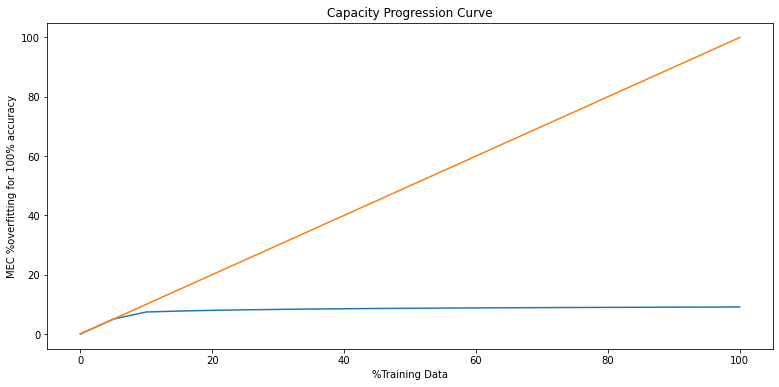

In [48]:
from matplotlib import pyplot as plt
percents_np = np.array(percents)
mecs_np = np.array(mecs)
mecs_np[1] = 25000
mecs_np = mecs_np / 5000
plt.figure(figsize=(13, 6))
plt.plot(percents_np, mecs_np)
plt.plot(percents_np, percents_np)
plt.title("Capacity Progression Curve")
plt.ylabel("MEC %overfitting for 100% accuracy")
plt.xlabel("%Training Data")
plt.show()

# Beginning of Correct Code

In [2]:
from numpy import genfromtxt
my_data = genfromtxt('fcinputs.csv', delimiter=',')

In [3]:
therows = my_data[1:]
theinputs = therows[:,:-1]
thetargets = therows[:,-1]
theinputs.shape, thetargets.shape

((50000, 64), (50000,))

In [4]:
def threshold_count(images, targets):
    N = len(images)
    sortedimages = []
    curr_class, thresholds = 0, 0
    for i in range(N):
        sortedimages.append((sum(images[i]), targets[i]))
    sortedimages.sort(key=lambda x: x[0])
    for j in range(N):
        if sortedimages[j][1] != curr_class:
            curr_class = sortedimages[j][1]
            thresholds += 1
    return thresholds

threshold_count(theinputs, thetargets)

44176

In [5]:
import numpy as np
def memorize_fcinputs(images, targets, d=64):
    minthreshs = np.log2(threshold_count(images, targets) + 1)
    return (minthreshs * (d + 1)) + (minthreshs + 1) * 10

memorize_fcinputs(theinputs, thetargets)

1167.3255872582897

MEC for 0 % of the data:  10.0 bits
MEC for 10 % of the data:  912.9446345755791 bits
MEC for 20 % of the data:  982.3255650844313 bits
MEC for 30 % of the data:  1021.8983743629258 bits
MEC for 40 % of the data:  1047.2737847357655 bits
MEC for 50 % of the data:  1066.285878043966 bits
MEC for 60 % of the data:  1080.8891541836497 bits
MEC for 70 % of the data:  1092.733846921523 bits
MEC for 80 % of the data:  1103.059032625731 bits
MEC for 90 % of the data:  1110.853741837403 bits
MEC for 100 % of the data:  1117.5323629139643 bits


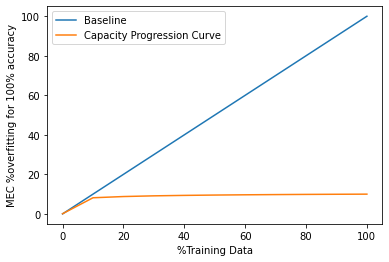

In [7]:
def capacity_progression(images, targets):
    N = len(images)
    sizes = list(range(0, 110, 10))
    mec_samples = []
    for s in sizes:
        sampleIdx = np.random.randint(N, size=int((s/100) * N))
        subsetImages = [images[i] for i in sampleIdx]
        subsetTargets = [targets[i] for i in sampleIdx]
        mec = memorize_fcinputs(subsetImages, subsetTargets)
        mec_samples.append(mec)
        print("MEC for", s, "% of the data: ", mec, "bits")
    return sizes, mec_samples

percents, mecs = capacity_progression(theinputs, thetargets)

from matplotlib import pyplot as plt
percents_np = np.array(percents)
mecs_np = np.array(mecs)
#mecs_np[1] = 25000
last = mecs_np[-1]
mecs_np = 10 * mecs_np / last
#plt.figure(figsize=(13, 6))
plt.plot(percents_np, percents_np , label="Baseline")
plt.plot(percents_np, mecs_np, label="Capacity Progression Curve")
#plt.title("Capacity Progression Curve")
plt.ylabel("MEC %overfitting for 100% accuracy")
plt.xlabel("%Training Data")
plt.legend()
plt.show()